In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
df = sns.load_dataset('iris')

<Axes: xlabel='sepal_length', ylabel='Density'>

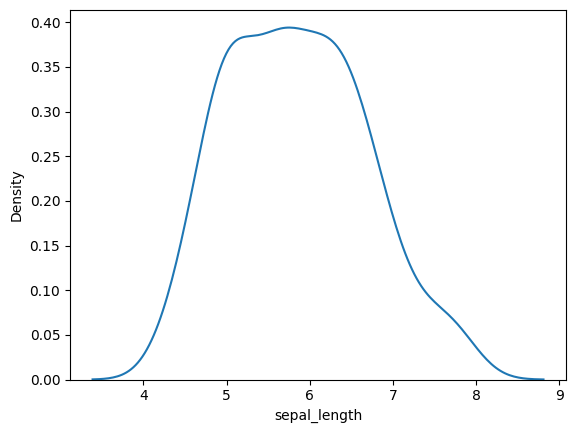

In [3]:
sns.kdeplot(df['sepal_length'])

In [4]:
temp=sorted(df['sepal_length'].tolist())

In [5]:
y_quant = []
for i in range(1,101):
    y_quant.append(np.percentile(temp,i))

In [6]:

samples=np.random.normal(loc=0,scale=1,size=1000)

In [7]:
x_quant = []
for i in range(1,101):
    x_quant.append(np.percentile(samples,i))

<Axes: >

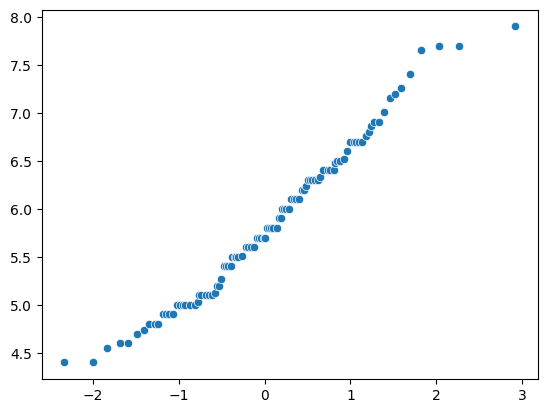

In [8]:
sns.scatterplot(x=x_quant,y=y_quant)

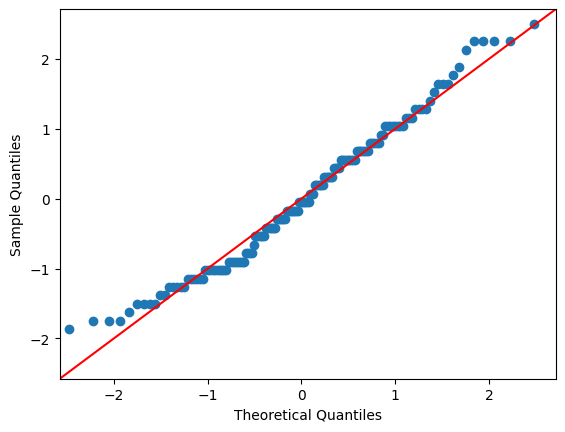

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


## QQ'
fig = sm.qqplot(df['sepal_length'],line='45',fit=True)

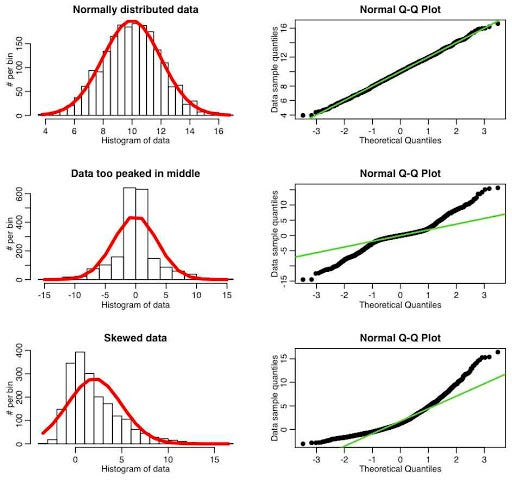

### Does QQplot gives only normal distribution?

In [10]:
X=np.random.uniform(low=0,high=1,size=1000)

(array([106., 112.,  98.,  93.,  84.,  93.,  90., 115., 104., 105.]),
 array([2.05682381e-04, 1.00155580e-01, 2.00105477e-01, 3.00055374e-01,
        4.00005272e-01, 4.99955169e-01, 5.99905066e-01, 6.99854964e-01,
        7.99804861e-01, 8.99754759e-01, 9.99704656e-01]),
 <BarContainer object of 10 artists>)

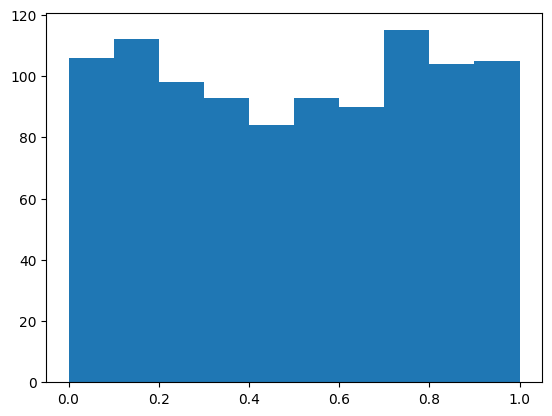

In [11]:
plt.hist(X)

In [12]:
from scipy import stats 
params=stats.uniform.fit(X)
dist = stats.uniform(loc=params[0],scale=params[1])

Text(0.5, 1.0, 'QQplot of uniform distribution with uniform fit')

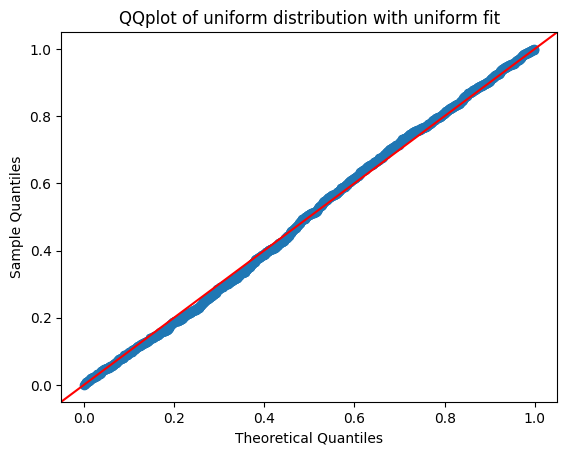

In [13]:
fig = sm.qqplot(X,dist=dist,line='45')
plt.title('QQplot of uniform distribution with uniform fit')

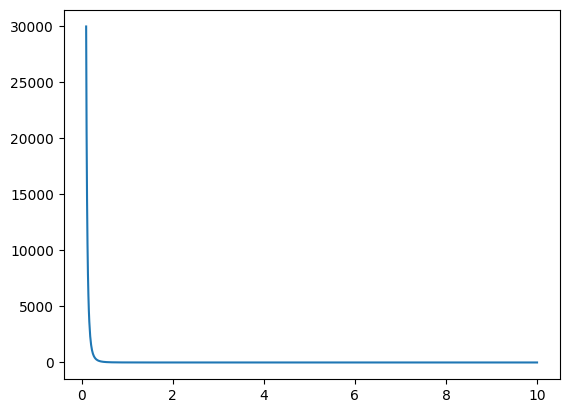

In [14]:
alpha=3
xm = 1

x=np.linspace(0.1,10,1000)

y=alpha*(xm**alpha)/(x**(alpha+1))
plt.plot(x,y)

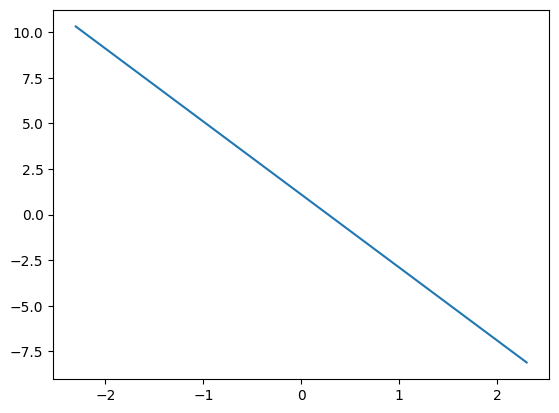

In [15]:
plt.plot(np.log(x),np.log(y))

(array([876.,  80.,  28.,   3.,   5.,   3.,   1.,   3.,   0.,   1.]),
 array([ 1.00030831,  2.87611508,  4.75192186,  6.62772863,  8.50353541,
        10.37934219, 12.25514896, 14.13095574, 16.00676251, 17.88256929,
        19.75837607]),
 <BarContainer object of 10 artists>)

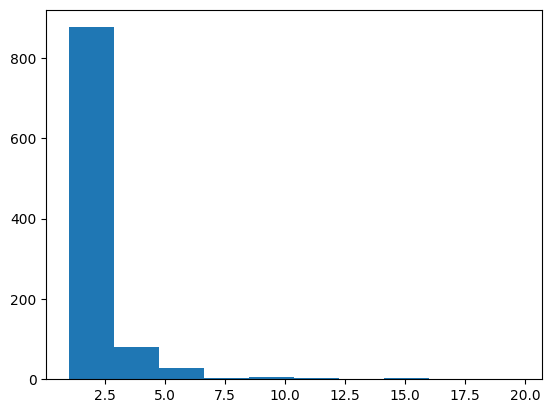

In [16]:
alpha=2
xm=1

x = stats.pareto.rvs(b=alpha,scale=xm,size=1000)
plt.hist(x)

Text(0.5, 1.0, 'QQplot woth pareto distribution with Pareto fit')

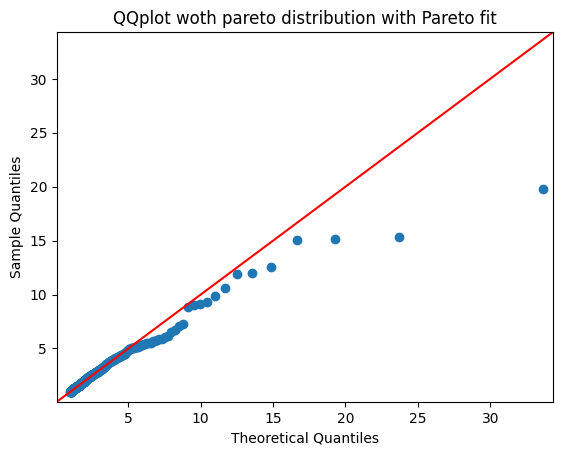

In [17]:
params=stats.pareto.fit(x,floc=0)
dist=stats.pareto(b=params[0],scale=params[2])
fig=sm.qqplot(x,dist=dist,line='45')
plt.title("QQplot woth pareto distribution with Pareto fit")

In [18]:
#DIistributions

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [19]:
df=pd.read_csv(r'D:\copy of htdocs\practice\Python\200days\Day152 Statistics_day_5\Titanic-Dataset.csv')

In [20]:
df['Age'].isnull().sum()

177

In [21]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [22]:


# Alternatively, if you want to explicitly select columns 1 and 2:
X = df.iloc[:, 1:6]
y = df.iloc[:, 0]

# Fill missing values in the 'Age' column
X['Age'].fillna(X['Age'].mean(), inplace=True)

# Continue with the rest of your code (train/test split, plotting, etc.)


In [23]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1314639527.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


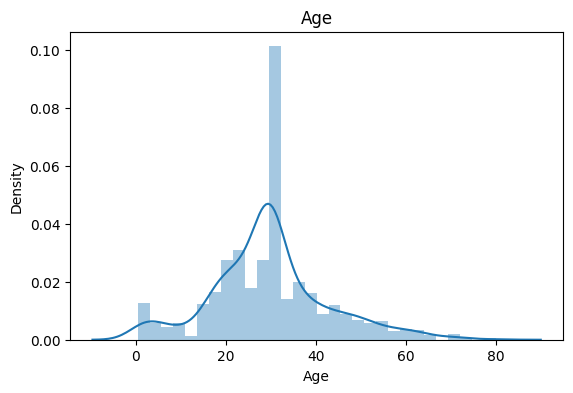

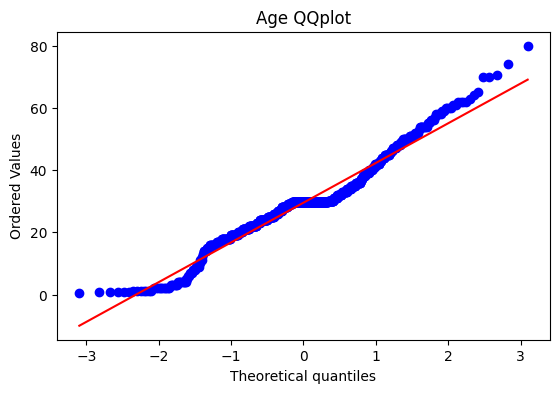

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Age'])
plt.title('Age')
plt.show()

plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age QQplot')
plt.show()

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
clf=LogisticRegression()
clf2 = DecisionTreeClassifier()

In [27]:


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the models and fit them to the data
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

# Evaluate the models
print("Accuracy LR:", accuracy_score(y_test, y_pred))
print("Accuracy DTC:",accuracy_score(y_test,y_pred2))

ValueError: could not convert string to float: 'Partner, Mr. Austen'

In [28]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# Assuming X_train and X_test are your datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 1: Separate numeric and non-numeric columns
numeric_cols = X_train.select_dtypes(include=np.number).columns
non_numeric_cols = X_train.select_dtypes(exclude=np.number).columns

# Step 2: Create and apply the transformer for numeric data
trf_numeric = FunctionTransformer(func=np.log1p)
X_train_transformed_numeric = trf_numeric.fit_transform(X_train[numeric_cols])
X_test_transformed_numeric = trf_numeric.transform(X_test[numeric_cols])

# Step 3: Handle non-numeric data (if needed, for example, using one-hot encoding)
# For example, using pandas get_dummies:
X_train_transformed_non_numeric = pd.get_dummies(X_train[non_numeric_cols])
X_test_transformed_non_numeric = pd.get_dummies(X_test[non_numeric_cols])

# Step 4: Concatenate the transformed numeric and non-numeric data
X_train_transformed = pd.concat([X_train_transformed_numeric, X_train_transformed_non_numeric], axis=1)
X_test_transformed = pd.concat([X_test_transformed_numeric, X_test_transformed_non_numeric], axis=1)


In [29]:

# Create the models and fit them to the data
clf3 = LogisticRegression()
clf4 = DecisionTreeClassifier()

clf3.fit(X_train_transformed, y_train)
clf4.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred3 = clf.predict(X_test_transformed)
y_pred4 = clf2.predict(X_test_transformed)

# Evaluate the models
print("Accuracy LR:",accuracy_score(y_test, y_pred3))
print("Accuracy DTC:",accuracy_score(y_test,y_pred4))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Name_Abbing, Mr. Anthony
- Name_Alhomaki, Mr. Ilmari Rudolf
- Name_Ali, Mr. Ahmed
- Name_Andersen-Jensen, Miss. Carla Christine Nielsine
- Name_Andersson, Miss. Ingeborg Constanzia
- ...
Feature names seen at fit time, yet now missing:
- Name
- Sex


In [30]:
X_transformed = trf_numeric.fit_transform(X)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("Lr :",cross_val_score(clf,X_train_transformed,y,scoring='accuracy',cv=10))
print("dt :",cross_val_score(clf2,X_train_transformed,y,scoring='accuracy',cv=10))

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log1p method

KeyError: 'Fare'

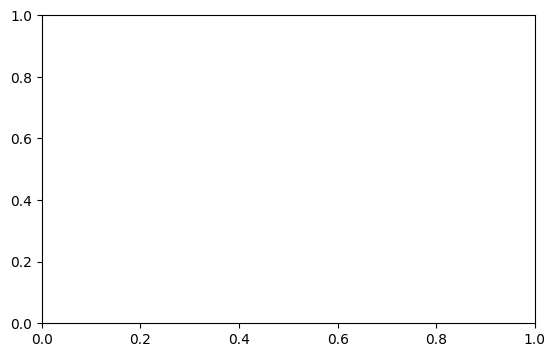

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Fare before log')
plt.show()

plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist="norm",plot=plt)
plt.title('Fare after plto')
plt.show()

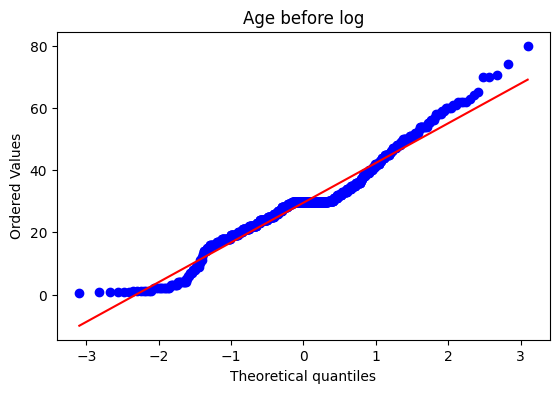

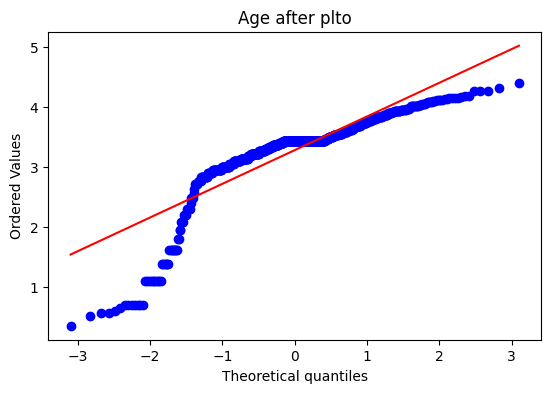

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age before log')
plt.show()

plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist="norm",plot=plt)
plt.title('Age after plto')
plt.show()

In [33]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
X_train_transformed=trf2.fit_transform(X_train)
X_test_transform=trf2.transform(X_test)

clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred=clf.predict(X_test_transform)
y_pred1 = clf.predict(X_test_transform)
print("Lr :",accuracy_score(y_test,y_pred))
print("dt :",accuracy_score(y_test,y_pred1))

ValueError: A given column is not a column of the dataframe

In [34]:
def ap_transform(transform):

    x1=df.iloc[:,3:6]
    y1=df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    x_trans = trf.fit_transform(x1)
    clf = LogisticRegression()
    print("Accuracy :",np.mean(cross_val_score(clf,x_trans,y1,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(x1['Fare'],dist='norm',plot=plt)
    plt.title("Fare before transform")

    plt.subplot(122)
    stats.probplot(x_trans[:,0],dist="norm",plot=plt)
    plt.title("Fare after transform")
    plt.show()

In [35]:
# for x
ap_transform(lambda x: x)

ValueError: A given column is not a column of the dataframe

In [ ]:
# for square
ap_transform(lambda x: x**2)

In [ ]:
# for square root
ap_transform(lambda x: x**1/2)

In [ ]:
# for reciprocal
ap_transform(lambda x: 1/(x+0.0000001))

In [37]:
from sklearn.preprocessing import PowerTransformer

In [39]:
df2=pd.read_csv(r'D:\copy of htdocs\practice\Python\200days\Day152 Statistics_day_5\concrete_data.csv')
df2.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [40]:
df2.shape

(1030, 9)

In [42]:
df2.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [43]:
df2.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [45]:
X3=df2.drop(columns=['Strength'])
y3 = df2.iloc[:,-1]

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X3,y3,test_size=0.2,random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression

In [49]:
lr2 = LinearRegression()
np.mean(cross_val_score(lr2,X3,y3,scoring='r2'))

0.46099404916628683

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1045106368.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1045106368.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykerne

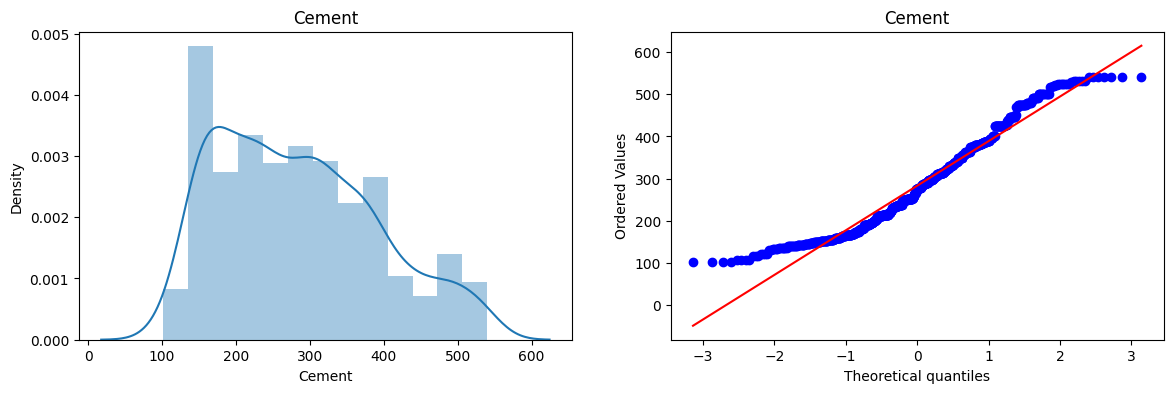

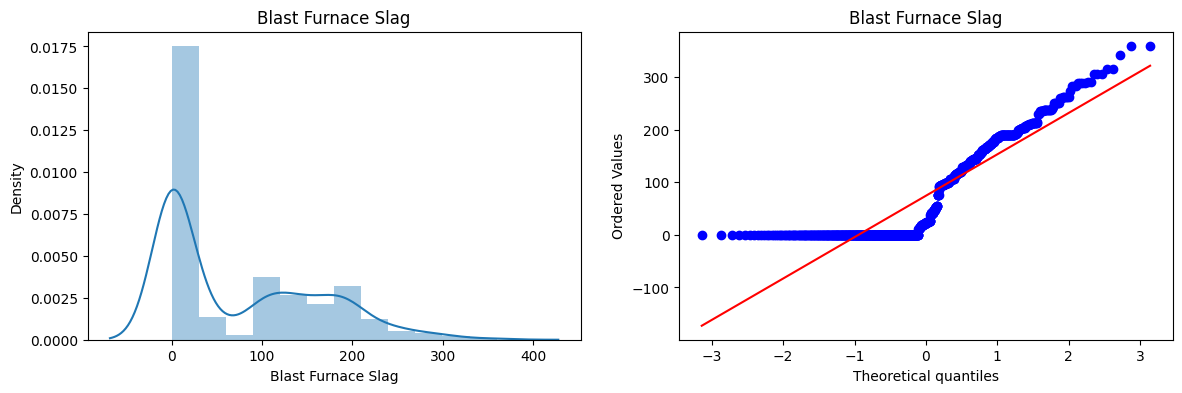

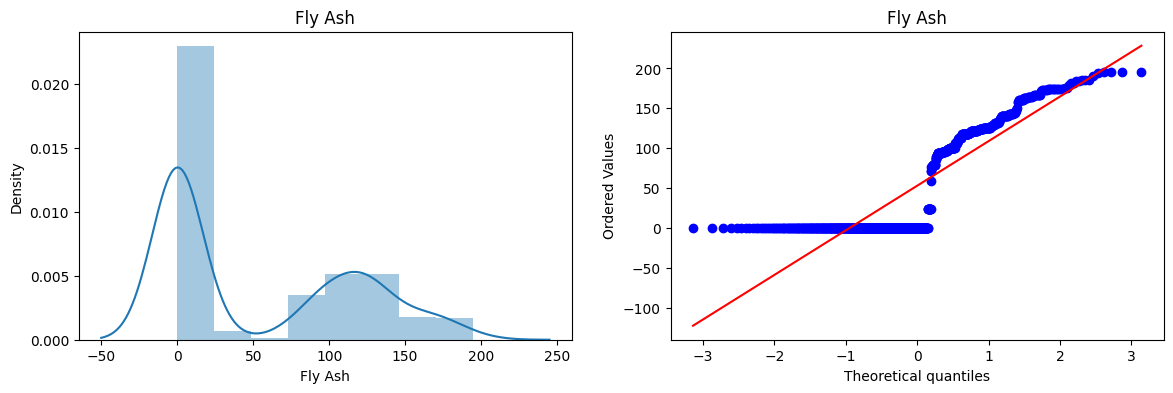

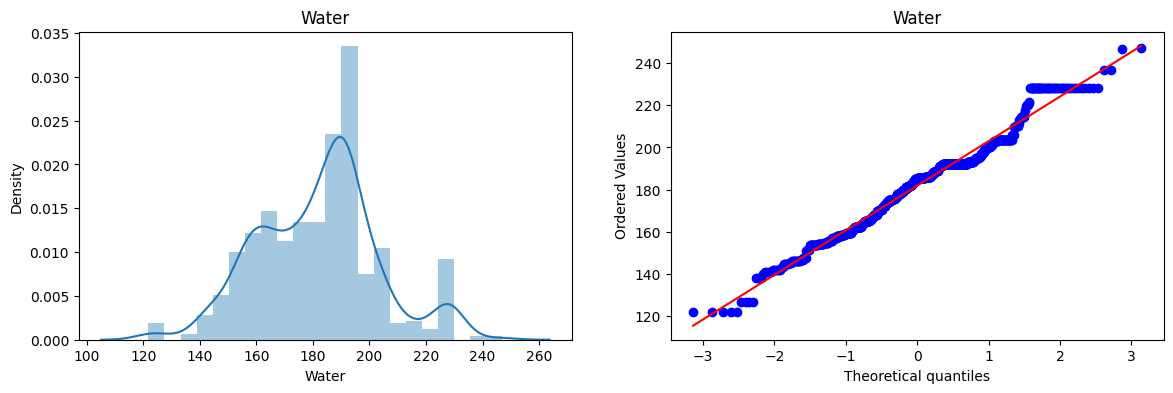

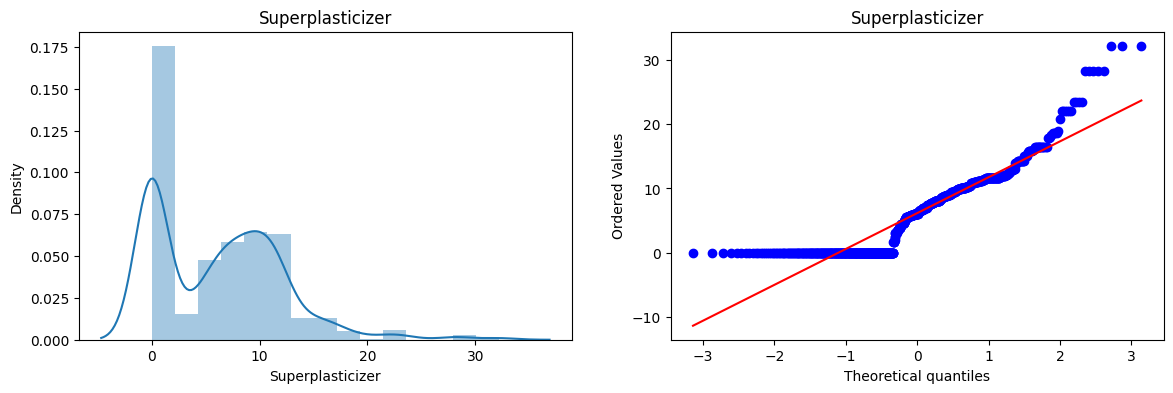

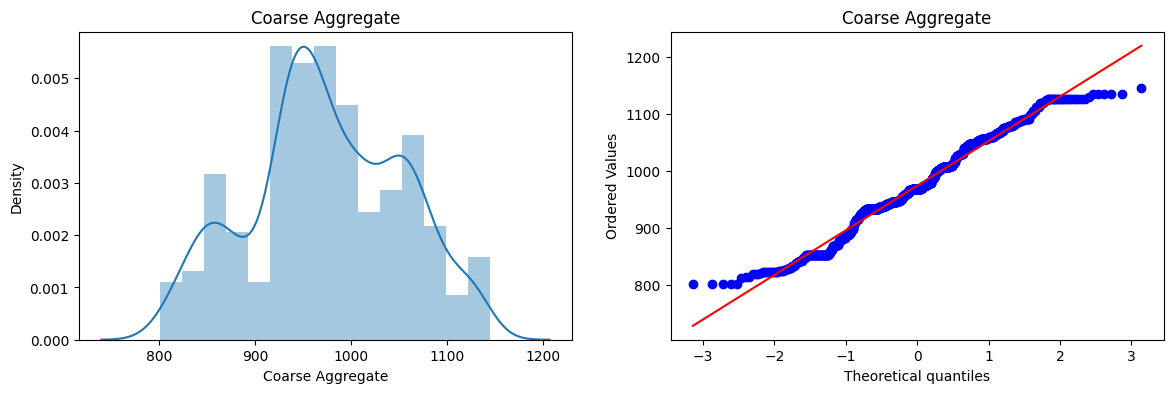

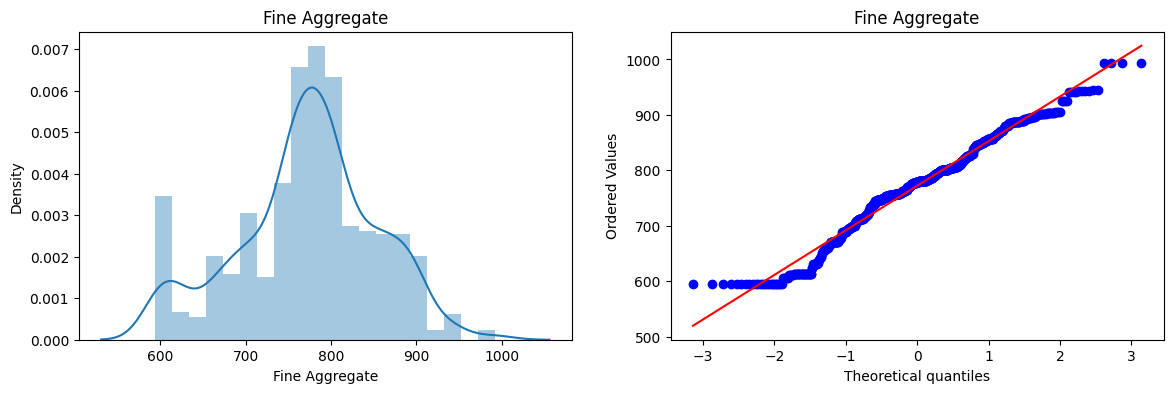

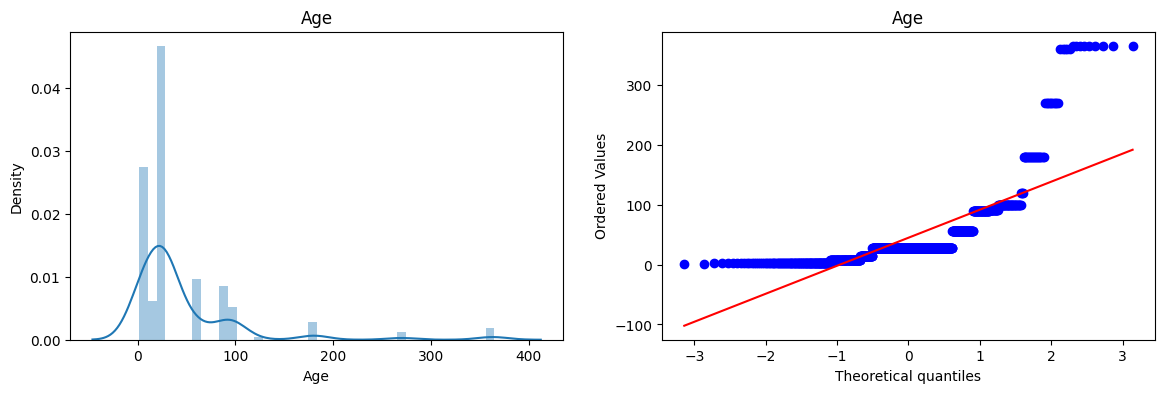

In [51]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist="norm",plot=plt)
    plt.title(col)
    

In [57]:
from sklearn.preprocessing import PowerTransformer

# Instantiate the PowerTransformer
pt = PowerTransformer()

# Fit and transform the training data
X_train_transformed3 = pt.fit_transform(X_train+0.000001)

# Transform the test data
X_test_transform3 = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [59]:
from sklearn.metrics import r2_score
lr2 = LinearRegression()
lr2.fit(X_train_transformed3,y_train)
y_pred3 = lr2.predict(X_test_transform3)

r2_score(y_test,y_pred3)

0.8161906545593434

In [60]:
pt = PowerTransformer(method='box-cox')
X_train_transformed3 = pt.fit_transform(X3+0.000001)

lr3 = LinearRegression()
np.mean(cross_val_score(lr3,X_train_transformed3,y3,scoring='r2'))

0.6662950327869239

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\751385685.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykernel_11752\751385685.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed3[col])


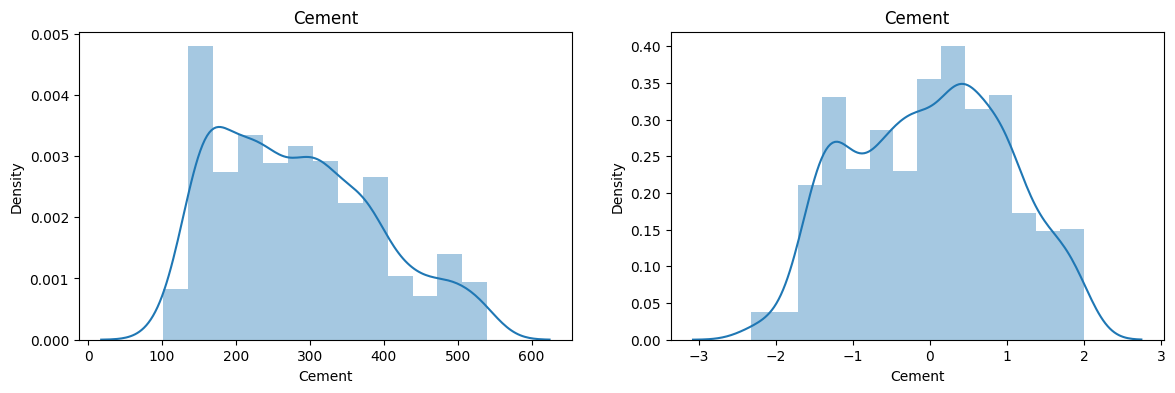

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\751385685.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykernel_11752\751385685.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed3[col])


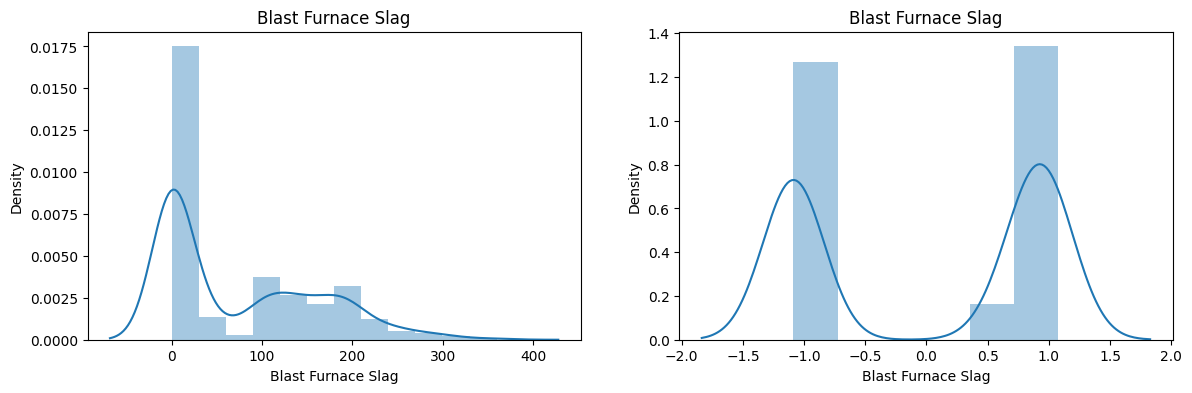

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\751385685.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykernel_11752\751385685.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed3[col])


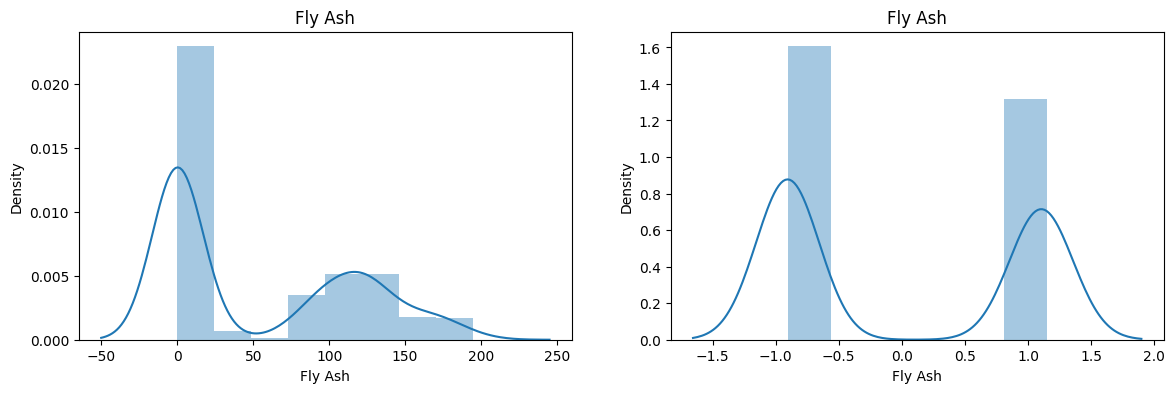

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\751385685.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykernel_11752\751385685.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed3[col])


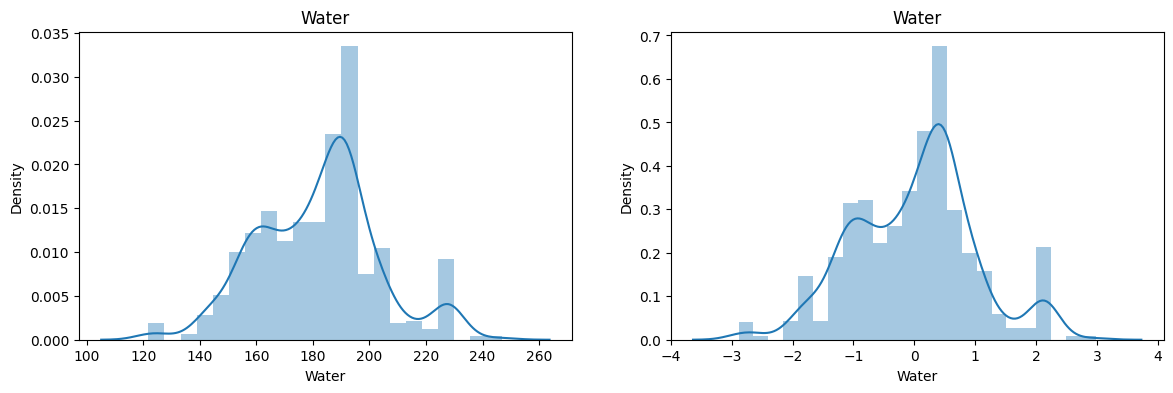

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\751385685.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykernel_11752\751385685.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed3[col])


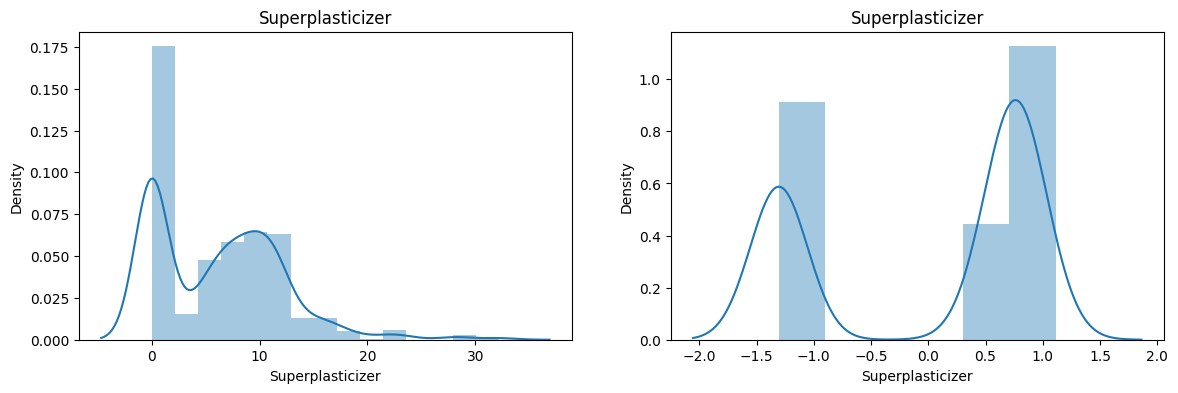

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\751385685.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykernel_11752\751385685.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed3[col])


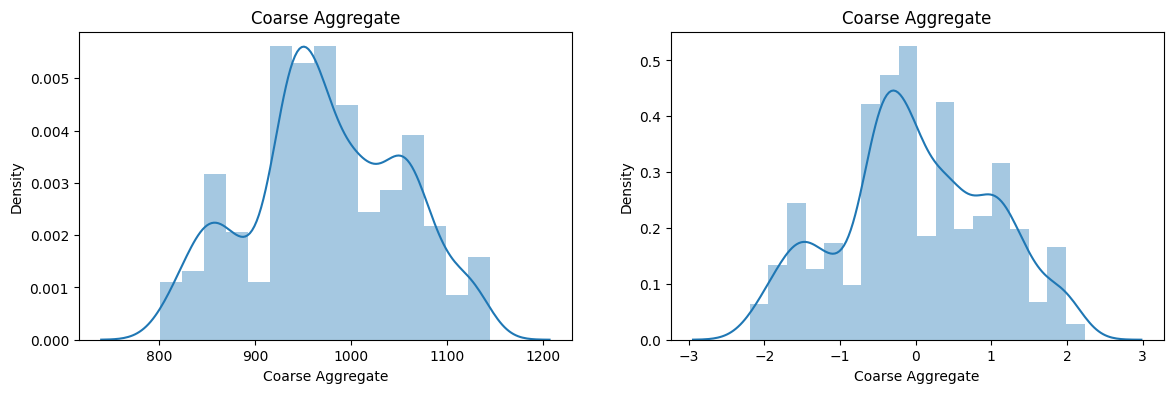

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\751385685.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykernel_11752\751385685.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed3[col])


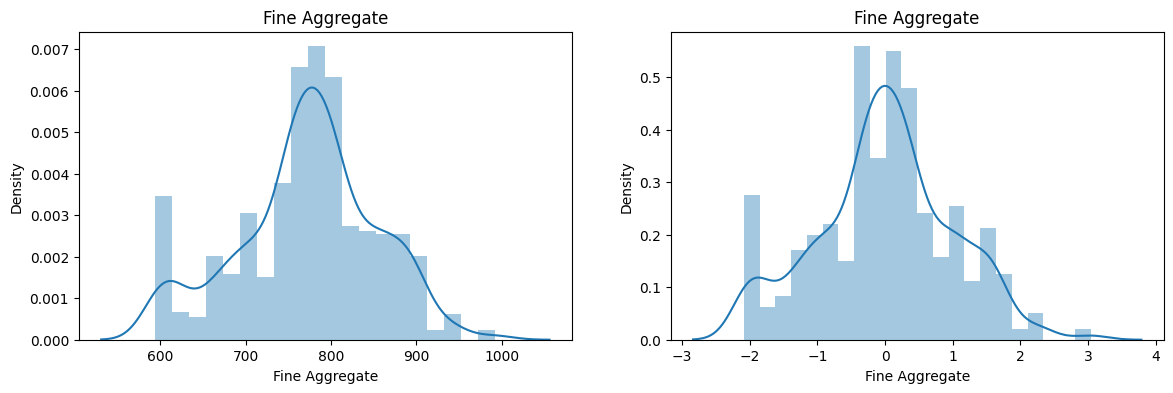

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\751385685.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykernel_11752\751385685.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed3[col])


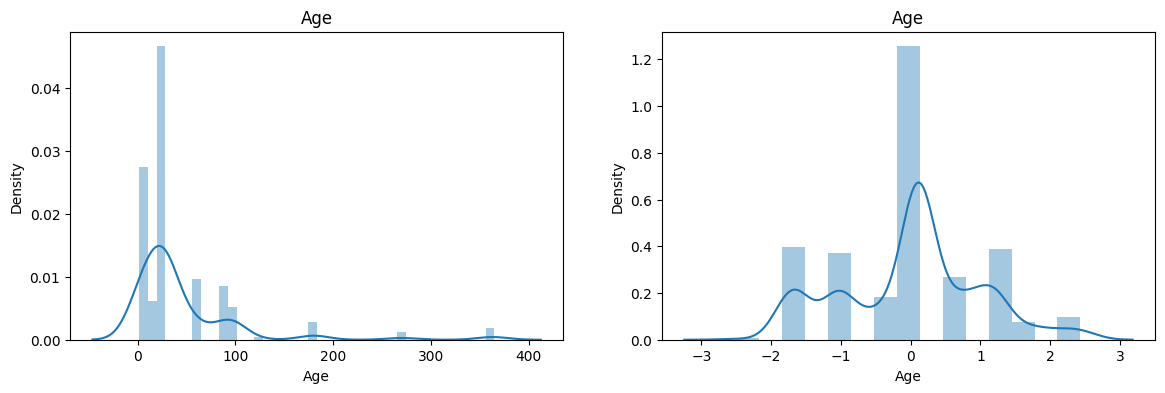

In [61]:
# before and after
X_train_transformed3 = pd.DataFrame(X_train_transformed3,columns=X_train.columns)
for col in X_train_transformed3.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed3[col])
    plt.title(col)

    plt.show()

In [65]:
# apply Yeo-Johnson transform
pt1 = PowerTransformer()

X_train_transformed3_1 = pt1.fit_transform(X_train)
X_test_transform3_2 = pt1.transform(X_test)

lr3 = LinearRegression()
lr3.fit(X_train_transformed3_1,y_train)

y_pred5 = lr3.predict(X_test_transform3_2)
print(r2_score(y_test,y_pred5))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906513339307


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [67]:
pt1_2 = PowerTransformer()

X_transformed2 = pt1_2.fit_transform(X3)

lr4 = LinearRegression()
np.mean(cross_val_score(lr4,X_transformed2,y3,scoring='r2'))

0.6834625134285742

In [68]:
X_train_transformed2 = pd.DataFrame(X_train_transformed3_1,columns=X_train.columns)

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1038760640.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1038760640.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


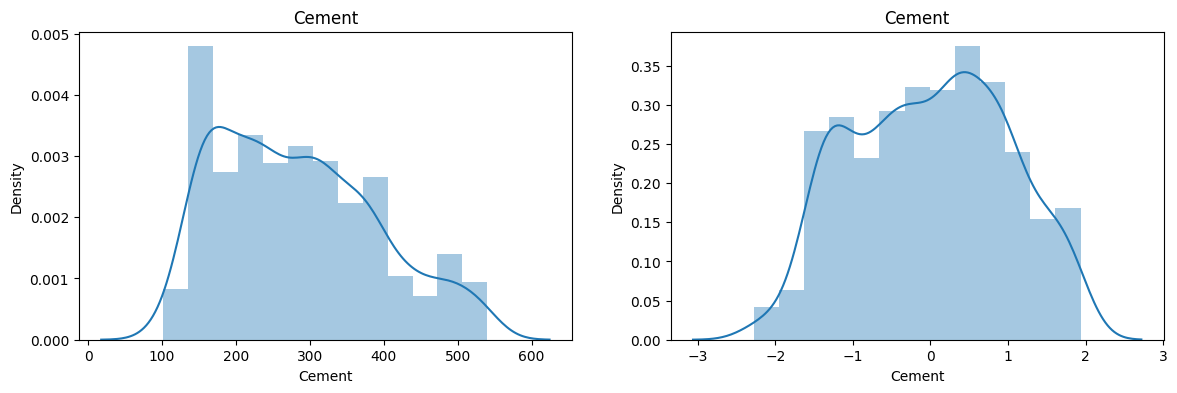

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1038760640.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1038760640.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


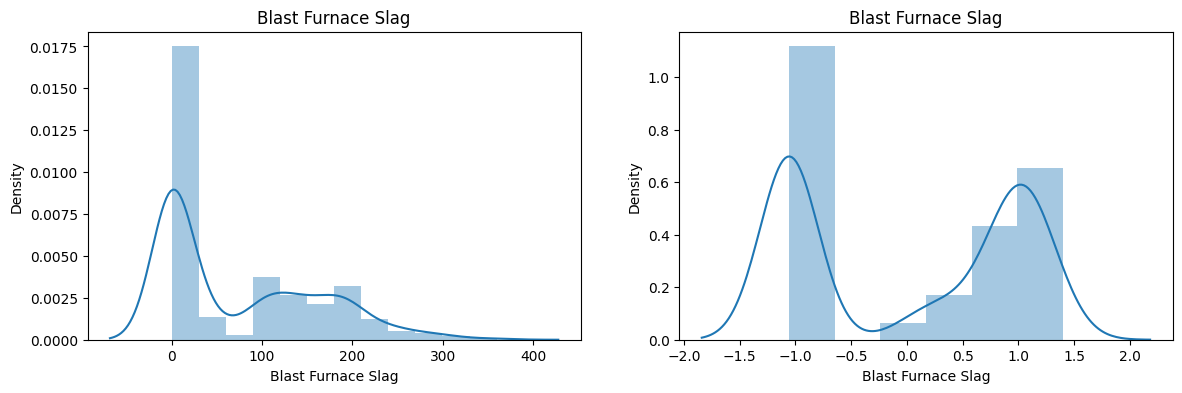

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1038760640.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1038760640.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


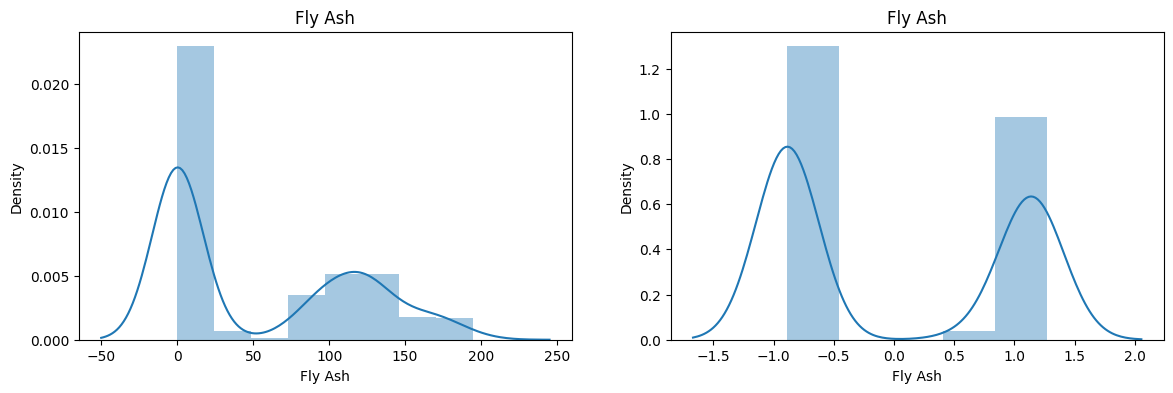

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1038760640.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1038760640.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


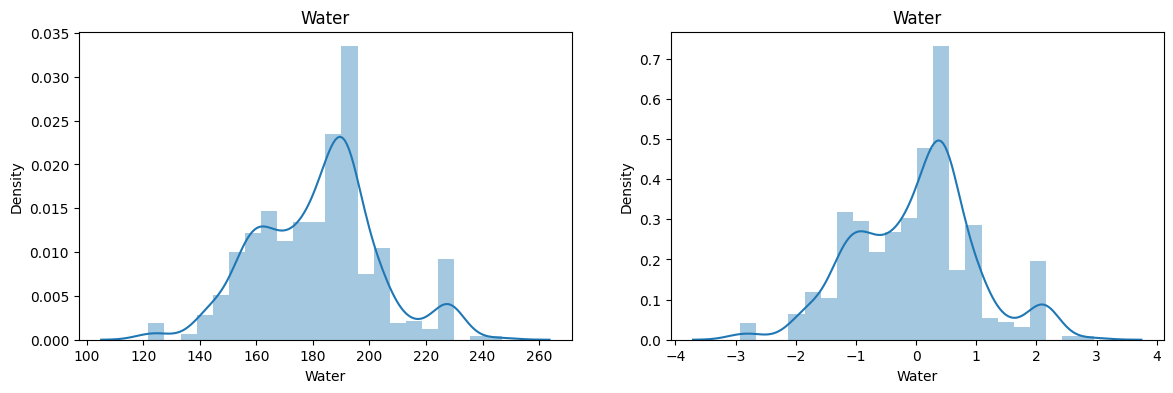

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1038760640.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1038760640.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


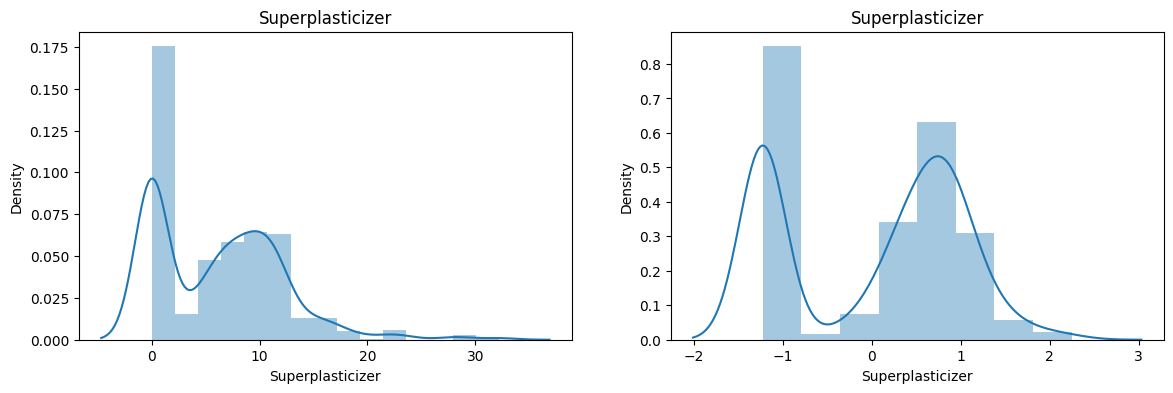

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1038760640.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1038760640.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


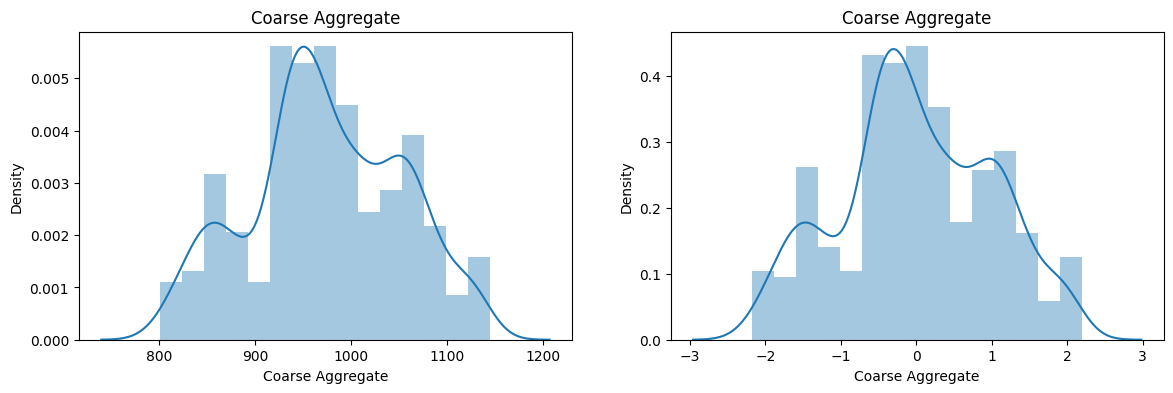

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1038760640.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1038760640.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


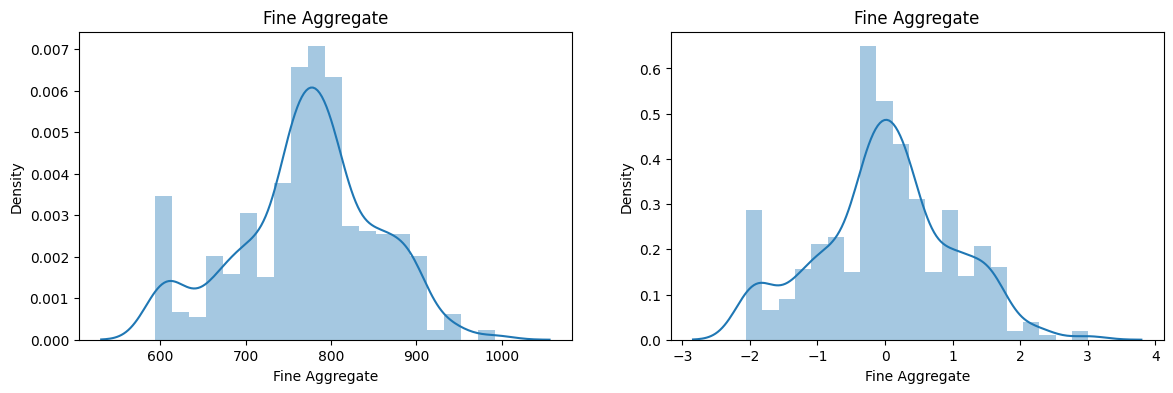

C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1038760640.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\panka\AppData\Local\Temp\ipykernel_11752\1038760640.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


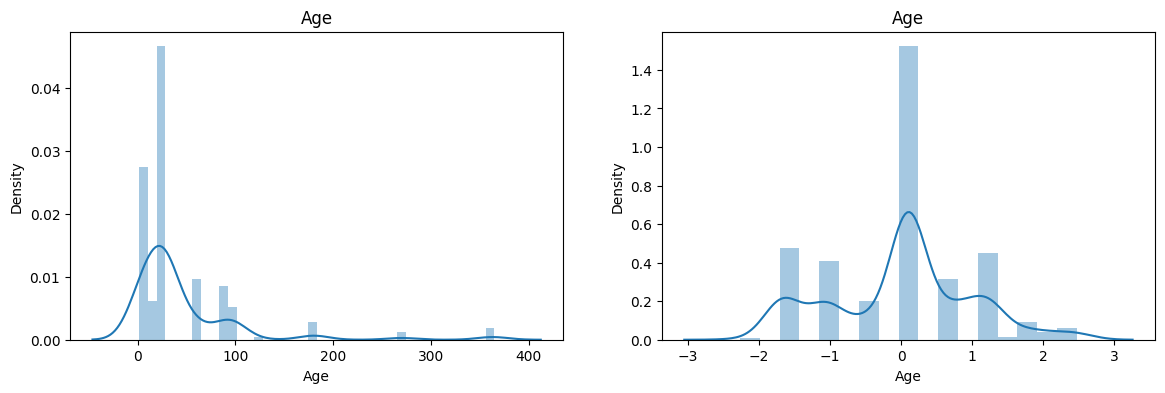

In [70]:
# before and after
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)

    plt.show()

In [72]:
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo-Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo-Johnson_lambdas
0,Cement,0.172271,0.174348
1,Blast Furnace Slag,0.025273,0.015715
2,Fly Ash,-0.032412,-0.161447
3,Water,0.809568,0.771307
4,Superplasticizer,0.099711,0.253935
5,Coarse Aggregate,1.129168,1.130050
6,Fine Aggregate,1.829625,1.783100
7,Age,0.048975,0.019885
